In [118]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_context('talk')

plt.rcParams['font.family'] = "Ubuntu"
vcolor = '#582c83'

In [119]:
df = pd.read_csv("./Files/ew19_wbz/groupedVotes.csv")

In [120]:
df.head()

,Name,Land,Regierungsbezirk,Kreis,Verbandsgemeinde,Gemeinde,Kennziffer Briefwahlzugehörigkeit,Bezirksart,Wahlberechtigte (A),Wahlberechtigte ohne Sperrvermerk (A1),...,DIE FRAUEN,Graue Panther,LKR,MENSCHLICHE WELT,NL,ÖkoLinX,Die Humanisten,PARTEI FÜR DIE TIERE,Gesundheitsforschung,Volt
0,Aach,7,2,35,5007,1,7,0,815,632,...,0,2,0,0,0,0,0,0,1,1
1,"Aach, Stadt",16,6,70,10002,2,0,5,1677,1416,...,5,2,2,2,1,2,2,1,1,3
2,"Aachen, Stadt",975,585,6630,390,390,0,170,177548,136457,...,107,132,113,80,93,122,512,126,85,3400
3,"Aalen, Stadt",608,76,2736,380076,6688,0,50,48694,38450,...,37,47,29,27,8,8,35,49,25,123
4,Aarbergen,42,28,273,7,7,0,5,4565,3782,...,2,9,1,3,1,2,4,6,3,12


In [122]:
redux = df.iloc[:,16:]
#redux['Volt'] = df['Volt']

In [123]:
redux.head()

,CDU,SPD,GRÜNE,DIE LINKE,AfD,CSU,FDP,FREIE WÄHLER,PIRATEN,Tierschutzpartei,...,DIE FRAUEN,Graue Panther,LKR,MENSCHLICHE WELT,NL,ÖkoLinX,Die Humanisten,PARTEI FÜR DIE TIERE,Gesundheitsforschung,Volt
0,114,79,73,10,21,0.0,13,11,3,1,...,0,2,0,0,0,0,0,0,1,1
1,341,104,195,25,109,0.0,54,52,5,13,...,5,2,2,2,1,2,2,1,1,3
2,25760,17904,37571,6300,5808,0.0,7099,455,1326,1271,...,107,132,113,80,93,122,512,126,85,3400
3,9356,4654,6673,895,2660,0.0,1496,830,167,281,...,37,47,29,27,8,8,35,49,25,123
4,653,559,466,79,264,0.0,137,33,12,40,...,2,9,1,3,1,2,4,6,3,12


In [124]:
corr = redux.corr()

In [125]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)

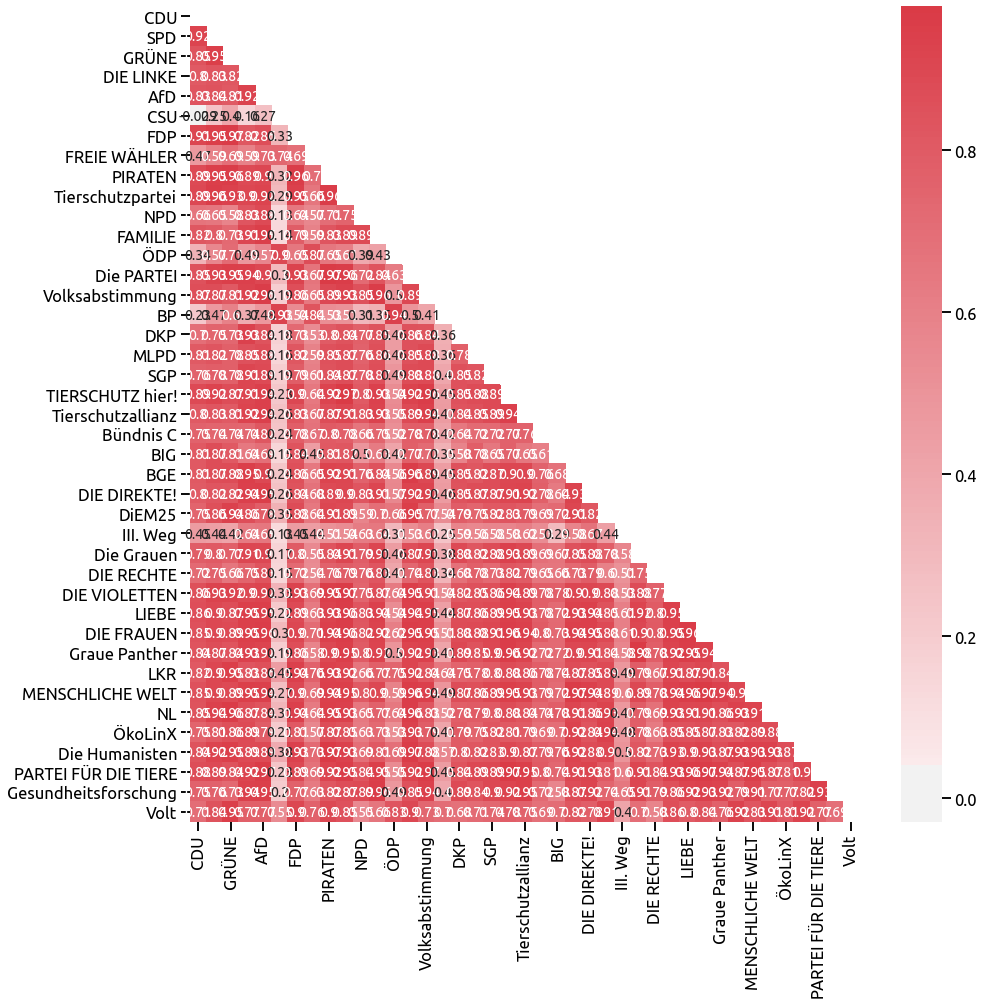

In [138]:
fig, ax = plt.subplots(figsize=(15,15))
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, ax=ax, mask=mask, cmap=cmap, center=0.0, annot=True, annot_kws={'size': 14})
plt.show()

---

In [127]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [128]:
redux.describe()

,CDU,SPD,GRÜNE,DIE LINKE,AfD,CSU,FDP,FREIE WÄHLER,PIRATEN,Tierschutzpartei,...,DIE FRAUEN,Graue Panther,LKR,MENSCHLICHE WELT,NL,ÖkoLinX,Die Humanisten,PARTEI FÜR DIE TIERE,Gesundheitsforschung,Volt
count,11103.000000,11103.000000,11103.000000,11103.000000,11103.000000,11103.000000,11103.000000,11103.000000,11103.000000,11103.00000,...,11103.000000,11103.000000,11103.000000,11103.000000,11103.000000,11103.000000,11103.000000,11103.000000,11103.000000,11103.000000
mean,760.062596,532.908403,691.441142,185.179591,369.670630,212.110871,182.706836,72.656309,21.913177,48.83599,...,4.980005,6.867964,3.959380,3.104566,1.432856,3.223994,5.638476,7.728452,6.382869,22.435198
std,2941.130481,2669.863684,4458.618926,1180.540799,1433.365564,1822.627173,898.143107,223.431452,124.018977,220.15599,...,21.237616,35.215880,19.883865,14.849796,10.543438,31.294025,36.242452,28.520291,25.688862,212.112636
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,39.000000,34.000000,10.000000,33.000000,0.000000,13.000000,5.000000,1.000000,4.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,120.000000,100.000000,110.000000,30.000000,98.000000,0.000000,34.000000,22.000000,4.000000,12.00000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000,2.000000,3.000000
75%,568.000000,332.000000,394.000000,96.000000,302.500000,0.000000,125.000000,80.000000,13.000000,35.00000,...,4.000000,5.000000,3.000000,3.000000,1.000000,2.000000,3.000000,7.000000,5.000000,10.000000
max,140966.000000,157840.000000,247719.000000,55375.000000,57588.000000,163350.000000,44355.000000,14721.000000,6478.000000,10973.00000,...,950.000000,1530.000000,990.000000,763.000000,723.000000,1692.000000,1601.000000,1154.000000,877.000000,13134.000000


In [129]:
redux.fillna(value=0.0, inplace=True)

In [130]:
X = redux.iloc[:,:-1]
y = redux['Volt']

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [132]:
reglin = LinearRegression()  
reglin.fit(X_train, y_train)

LinearRegression()

In [133]:
#To retrieve the intercept:
print(reglin.intercept_)#For retrieving the slope:
print(reglin.coef_)

1.638544662037674
[-2.15389633e-02 -1.85397082e-03  2.55397513e-02  4.45550472e-02
  2.20155224e-02 -1.10723910e-02  1.17882146e-01 -3.29256860e-02
 -4.27515506e-01 -2.46229032e-01  5.99306192e-02  1.81261149e-01
  2.78490691e-01  4.92982841e-02  3.13269189e-01 -2.10406076e-01
 -1.53546945e+00 -5.76600953e-01  1.71440616e-02  3.83421534e-01
 -7.98019476e-02 -7.25348104e-01  1.51979127e-01 -1.77551641e+00
  6.74051106e-01  4.74308026e-01  2.53418063e-01 -9.27950082e-01
 -1.04447887e+00 -5.45148720e-01 -5.09524493e-01  1.28445909e-01
  4.96199434e-01 -2.62544391e-01 -2.35415803e+00  7.84703559e-01
 -5.25152406e-01  1.84184310e+00 -3.41083704e-01  3.05973644e-01]


In [134]:
y_pred = reglin.predict(X_test)

In [135]:
comp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})


In [136]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 12.251298356757061
Mean Squared Error: 2417.4629640680755
Root Mean Squared Error: 49.167702448539075


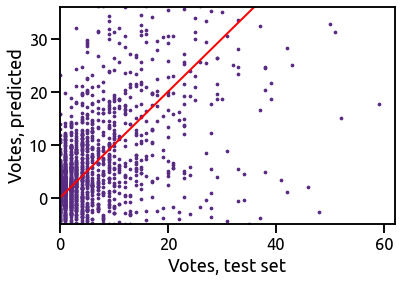

In [137]:
plt.scatter(y_test, y_pred, color=vcolor, s=5)
plt.plot([0,36], [0,36], c='r', lw=2)
plt.xlim(0, 62)
plt.ylim(-5, 36)
plt.xlabel("Votes, test set")
plt.ylabel("Votes, predicted")
plt.show()

---

### Fractional logit

In [112]:
share = pd.read_csv("./Files/ew19_wbz/groupedVotes.csv")

In [113]:
share.head()

,Name,Land,Regierungsbezirk,Kreis,Verbandsgemeinde,Gemeinde,Kennziffer Briefwahlzugehörigkeit,Bezirksart,Wahlberechtigte (A),Wahlberechtigte ohne Sperrvermerk (A1),...,DIE FRAUEN,Graue Panther,LKR,MENSCHLICHE WELT,NL,ÖkoLinX,Die Humanisten,PARTEI FÜR DIE TIERE,Gesundheitsforschung,Volt
0,Aach,7,2,35,5007,1,7,0,815,632,...,0,2,0,0,0,0,0,0,1,1
1,"Aach, Stadt",16,6,70,10002,2,0,5,1677,1416,...,5,2,2,2,1,2,2,1,1,3
2,"Aachen, Stadt",975,585,6630,390,390,0,170,177548,136457,...,107,132,113,80,93,122,512,126,85,3400
3,"Aalen, Stadt",608,76,2736,380076,6688,0,50,48694,38450,...,37,47,29,27,8,8,35,49,25,123
4,Aarbergen,42,28,273,7,7,0,5,4565,3782,...,2,9,1,3,1,2,4,6,3,12


In [144]:
redux = df.iloc[:,16:]
#redux['Volt'] = df['Volt']

In [145]:
redux.head()

,CDU,SPD,GRÜNE,DIE LINKE,AfD,CSU,FDP,FREIE WÄHLER,PIRATEN,Tierschutzpartei,...,DIE FRAUEN,Graue Panther,LKR,MENSCHLICHE WELT,NL,ÖkoLinX,Die Humanisten,PARTEI FÜR DIE TIERE,Gesundheitsforschung,Volt
0,114,79,73,10,21,0.0,13,11,3,1,...,0,2,0,0,0,0,0,0,1,1
1,341,104,195,25,109,0.0,54,52,5,13,...,5,2,2,2,1,2,2,1,1,3
2,25760,17904,37571,6300,5808,0.0,7099,455,1326,1271,...,107,132,113,80,93,122,512,126,85,3400
3,9356,4654,6673,895,2660,0.0,1496,830,167,281,...,37,47,29,27,8,8,35,49,25,123
4,653,559,466,79,264,0.0,137,33,12,40,...,2,9,1,3,1,2,4,6,3,12


In [146]:
snew = redux.div(redux.sum(axis=1), axis=0)

In [147]:
snew.head()

,CDU,SPD,GRÜNE,DIE LINKE,AfD,CSU,FDP,FREIE WÄHLER,PIRATEN,Tierschutzpartei,...,DIE FRAUEN,Graue Panther,LKR,MENSCHLICHE WELT,NL,ÖkoLinX,Die Humanisten,PARTEI FÜR DIE TIERE,Gesundheitsforschung,Volt
0,0.326648,0.226361,0.209169,0.028653,0.060172,0.0,0.037249,0.031519,0.008596,0.002865,...,0.000000,0.005731,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002865,0.002865
1,0.349385,0.106557,0.199795,0.025615,0.111680,0.0,0.055328,0.053279,0.005123,0.013320,...,0.005123,0.002049,0.002049,0.002049,0.001025,0.002049,0.002049,0.001025,0.001025,0.003074
2,0.220463,0.153229,0.321546,0.053918,0.049707,0.0,0.060756,0.003894,0.011348,0.010878,...,0.000916,0.001130,0.000967,0.000685,0.000796,0.001044,0.004382,0.001078,0.000727,0.029098
3,0.325539,0.161935,0.232185,0.031141,0.092554,0.0,0.052053,0.028880,0.005811,0.009777,...,0.001287,0.001635,0.001009,0.000939,0.000278,0.000278,0.001218,0.001705,0.000870,0.004280
4,0.267952,0.229380,0.191219,0.032417,0.108330,0.0,0.056217,0.013541,0.004924,0.016414,...,0.000821,0.003693,0.000410,0.001231,0.000410,0.000821,0.001641,0.002462,0.001231,0.004924


In [148]:
import statsmodels.api as sm

In [149]:
y = snew['Volt']
X = snew.iloc[:,0:-1]

In [150]:
mod = sm.Logit(y, X)

In [151]:
res = mod.fit()

Optimization terminated successfully.
         Current function value: 0.004210
         Iterations 13


In [152]:
res.summary()

/home/guimas/anaconda3/envs/volt/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:3409: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Volt   No. Observations:                11103
Model:                          Logit   Df Residuals:                    11063
Method:                           MLE   Df Model:                           39
Date:                Sun, 05 Jul 2020   Pseudo R-squ.:                     inf
Time:                        14:32:34   Log-Likelihood:                -46.739
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
CDU                     -6.7550      1.489     -4.536      0.000      -9.674      -3.836
SPD                     -6.0460      2.232     -2.708      0.007     -10.421      -1.671
GRÜNE                   -3.8234      2.239     -1.708      0.088      -8.211       0.564
DIE LINKE               -6.9564      6.004     -1.159      0.247     -18.724       4.811
AfD                     -5.5179      3.205     -1.721      0.085     -11.801       0.765
CSU                     -6.5859      1.775     -3.710      0.000     -10.066      -3.106
FDP                     -4.0756      6.757     -0.603      0.546     -17.318       9.167
FREIE WÄHLER            -5.6421      7.473     -0.755      0.450     -20.288       9.004
PIRATEN                 -5.4353     27.965     -0.194      0.846     -60.245      49.374
Tierschutzpartei        -6.3812     19.027     -0.335      0.737     -43.673      30.911
NPD                     -6.3131     26.754     -0.236      0.813     -58.751      46.125
FAMILIE                 -7.5331     23.360     -0.322      0.747     -53.318      38.251
ÖDP                     -4.3848      8.083     -0.542      0.588     -20.228      11.458
Die PARTEI               1.6993     14.875      0.114      0.909     -27.456      30.854
Volksabstimmung         -9.8072     65.203     -0.150      0.880    -137.603     117.989
BP                      -4.7148     44.996     -0.105      0.917     -92.905      83.476
DKP                      1.5749    128.132      0.012      0.990    -249.559     252.709
MLPD                   -16.6449    146.017     -0.114      0.909    -302.832     269.542
SGP                      4.4572    192.134      0.023      0.981    -372.118     381.033
TIERSCHUTZ hier!       -10.2577     49.002     -0.209      0.834    -106.300      85.785
Tierschutzallianz       -3.3897     53.715     -0.063      0.950    -108.670     101.891
Bündnis C              -11.3818     40.375     -0.282      0.778     -90.516      67.753
BIG                     12.6385     87.667      0.144      0.885    -159.187     184.464
BGE                     -2.0387     66.612     -0.031      0.976    -132.597     128.519
DIE DIREKTE!            -9.2956    102.924     -0.090      0.928    -211.022     192.431
DiEM25                   3.9561     52.576      0.075      0.940     -99.091     107.003
III. Weg                40.5736     92.007      0.441      0.659    -139.756     220.903
Die Grauen              -0.8778     55.357     -0.016      0.987    -109.376     107.620
DIE RECHTE              -1.6181     87.631     -0.018      0.985    -173.371     170.135
DIE VIOLETTEN           -2.0382     77.353     -0.026      0.979    -153.648     149.571
LIEBE                  -14.2349     79.059     -0.180      0.857    -169.188     140.718
DIE FRAUEN              -6.9079     67.284     -0.103      0.918    -138.782     124.966
Graue Panther           -2.3466     56.303     -0.042      0.967    -112.698     108.005
LKR                      1.5219     8

In [153]:
snew['pred'] = res.predict(X)

In [154]:
snew[['Volt','pred']]

,Volt,pred
0,0.002865,0.003785
1,0.003074,0.004770
2,0.029098,0.009448
3,0.004280,0.004664
4,0.004924,0.004973
...,...,...
11098,0.008310,0.003485
11099,0.002449,0.004207
11100,0.003802,0.003386
11101,0.007042,0.003535


In [155]:
np.abs(snew['Volt']-snew['pred']).sum()/len(snew)

0.002492595890440305

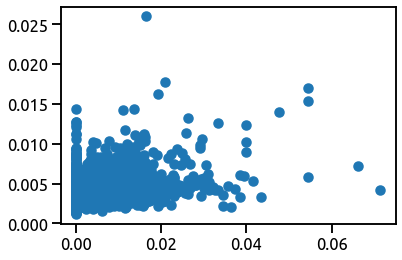

In [156]:
plt.scatter(snew['Volt'].values, snew['pred'].values)